
Random Forest (Raw Features):
  MSE: 3289.69
  R²:  0.5923


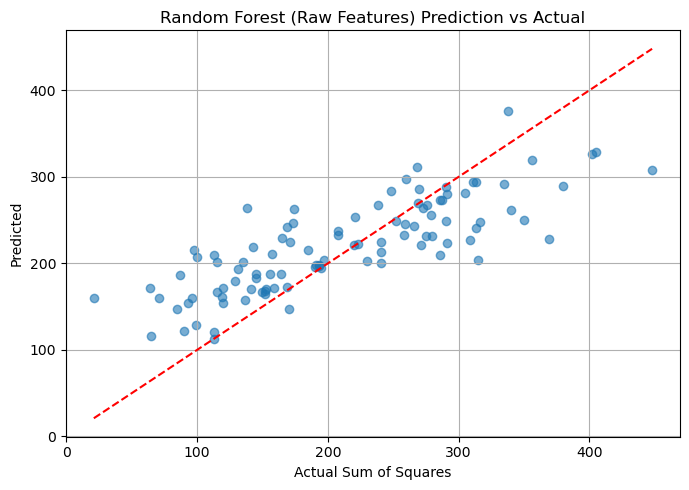

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
train_df = pd.read_csv('train_3x3_eigen_data.csv')
test_df = pd.read_csv('test_3x3_eigen_data.csv')

feature_cols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']
X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("\nRandom Forest (Raw Features):")
print(f"  MSE: {mse:.2f}")
print(f"  R²:  {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_3x3_eigen_data.csv', index=False)

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("Random Forest (Raw Features) Prediction vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()


Random Forest (Enhanced Features):
  MSE: 2016.90
  R²:  0.7500


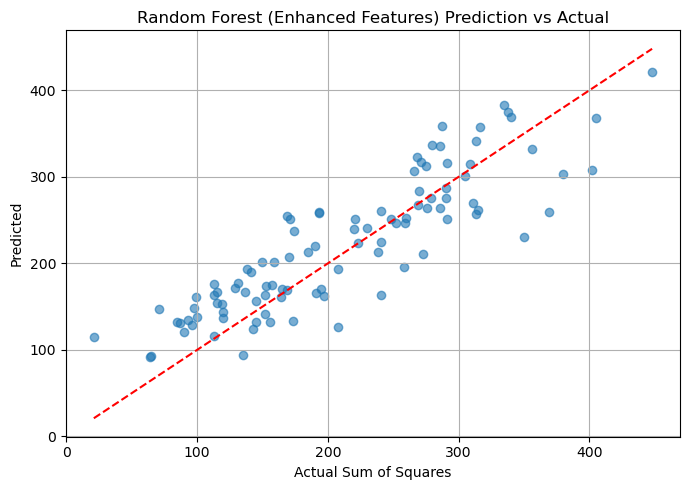

In [6]:
import numpy as np

def add_features(df):
    df['trace'] = df['a'] + df['e'] + df['i']
    df['sym_score'] = abs(df['b'] - df['d']) + abs(df['c'] - df['g']) + abs(df['f'] - df['h'])

    def det_3x3(row):
        mat = np.array([[row['a'], row['b'], row['c']],
                        [row['d'], row['e'], row['f']],
                        [row['g'], row['h'], row['i']]])
        return np.linalg.det(mat)

    df['det'] = df.apply(det_3x3, axis=1)
    return df

train_df = add_features(pd.read_csv('train_3x3_eigen_data.csv'))
test_df = add_features(pd.read_csv('test_3x3_eigen_data.csv'))

feature_cols = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'trace', 'det', 'sym_score']
X_train = train_df[feature_cols]
y_train = train_df['sum_squared']
X_test = test_df[feature_cols]
y_true = test_df['sum_squared']

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print("\nRandom Forest (Enhanced Features):")
print(f"  MSE: {mse:.2f}")
print(f"  R²:  {r2:.4f}")

test_df['predicted_sum_squared'] = y_pred
test_df.to_csv('test_3x3_eigen_data.csv', index=False)

plt.figure(figsize=(7, 5))
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.xlabel("Actual Sum of Squares")
plt.ylabel("Predicted")
plt.title("Random Forest (Enhanced Features) Prediction vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()